Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [3]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True


callbacks = myCallback()

--2019-04-10 21:48:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-04-10 21:48:00 (134 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



['happy1-08.png', 'happy1-14.png', 'happy2-03.png']
['sad1-15.png', 'sad2-16.png', 'sad2-04.png', 'sad1-06.png', 'sad1-14.png', 'sad1-02.png', 'sad1-01.png', 'sad1-12.png', 'sad2-08.png', 'sad2-07.png']
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)


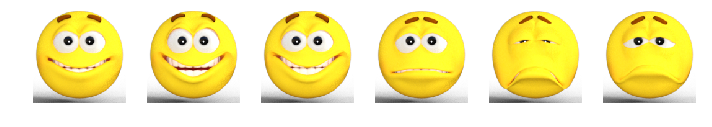

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 8
ncols = 8

# Index for iterating over images
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)
# Note this how to get read images:::


train_happy_dir = os.path.join("/tmp/h-or-s/happy")
train_sad_dir = os.path.join("/tmp/h-or-s/sad")

train_happy = os.listdir(train_happy_dir)
print(train_happy[0:3])

train_sad = os.listdir(train_sad_dir)
print(train_sad[:10])

pic_index += 3
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy[pic_index-3:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad[pic_index-3:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  print(np.shape(img))
plt.show()

In [4]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Your Code Here
    #tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-s',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [14]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
    train_generator,
      steps_per_epoch=2,  
      epochs=15,
      verbose=1)
      # Your Code Here)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
2/2 [==============================] - 2s 1s/step - loss: 0.0055 - acc: 1.0000
Epoch 2/15
2/2 [==============================] - 2s 1s/step - loss: 0.0022 - acc: 1.0000
Epoch 3/15
2/2 [==============================] - 2s 1s/step - loss: 0.0014 - acc: 1.0000
Epoch 4/15
2/2 [==============================] - 2s 1s/step - loss: 0.0012 - acc: 1.0000
Epoch 5/15
2/2 [==============================] - 2s 1s/step - loss: 8.9271e-04 - acc: 1.0000
Epoch 6/15
2/2 [==============================] - 2s 1s/step - loss: 0.0011 - acc: 1.0000 
Epoch 7/15
1/2 [==============>...............] - ETA: 0s - loss: 0.0012 - acc: 1.0000

KeyboardInterrupt: ignored